# Sprint セグメンテーション１

【問題1】学習・推定

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/zhixuhao/unet.git

fatal: destination path 'unet' already exists and is not an empty directory.


In [3]:
cd unet

/content/unet


In [ ]:
pip install --upgrade keras

In [5]:
!pip list | grep Keras

Keras                         2.4.3         
Keras-Applications            1.0.8         
Keras-Preprocessing           1.1.2         


In [6]:
!pip uninstall keras

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/docs/*
    /usr/local/lib/python3.7/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.7/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3


In [7]:
!pip install keras==2.3.1

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl


In [8]:
!pip install --upgrade tensorflow==1.14

Requirement already up-to-date: tensorflow==1.14 in /usr/local/lib/python3.7/dist-packages (1.14.0)


In [11]:
!pip list | grep Keras

Keras                         2.3.1         
Keras-Applications            1.0.8         
Keras-Preprocessing           1.1.2         


In [12]:
!pip list | grep tensorflow

tensorflow                    1.14.0        
tensorflow-datasets           4.0.1         
tensorflow-estimator          1.14.0        
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.29.0        
tensorflow-probability        0.12.1        


"data/membrane"配下の画像を課題で指定されたものに入れ替えてから下記を実行

In [45]:
import os

In [78]:
cd /content/drive/MyDrive/unet

/content/drive/MyDrive/unet


In [85]:
path = './data/membrane/test/'
flist = os.listdir(path)
print(flist[0])

c2e472a205.png


In [90]:
for i, f_name in enumerate(flist):
  os.rename(path+f_name, path+str(i)+".png")

In [91]:
flist = os.listdir(path)
print(flist[0])

0.png


In [ ]:
from model import *
from data import *

In [80]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=10,epochs=5,callbacks=[model_checkpoint])

/content/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
10/10 [==============================] - 166s 17s/step - loss: 0.6166 - accuracy: 0.8335

Epoch 00001: loss improved from inf to 0.61661, saving model to unet_membrane.hdf5
Epoch 2/5
10/10 [==============================] - 153s 15s/step - loss: 0.5738 - accuracy: 0.7755

Epoch 00002: loss improved from 0.61661 to 0.57380, saving model to unet_membrane.hdf5
Epoch 3/5
10/10 [==============================] - 154s 15s/step - loss: 0.6213 - accuracy: 0.7929

Epoch 00003: loss did not improve from 0.57380
Epoch 4/5
10/10 [==============================] - 153s 15s/step - loss: 0.6098 - accuracy: 0.7195

Epoch 00004: loss did not improve from 0.57380
Epoch 5/5
10/10 [==============================] - 161s 16s/step - loss: 0.5693 - accuracy: 0.7832

Epoch 00005: loss improved from 0.57380 to 0.56933, saving model to unet_membrane.hdf5


In [92]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

/content/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


30/30 [==============================] - 62s 2s/step


/content/unet/data.py:124: UserWarning: data/membrane/test/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: data/membrane/test/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: data/membrane/test/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: data/membrane/test/3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: data/membrane/test/4_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: data/membrane/test/5_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/unet/data.py:124: UserWarning: data/membrane/test

In [93]:
results.shape

(30, 256, 256, 1)

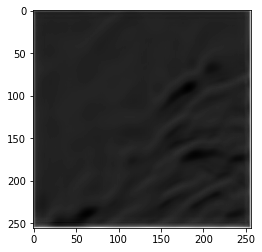

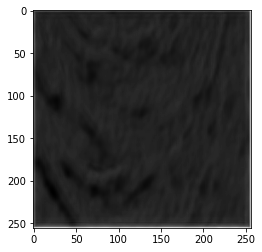

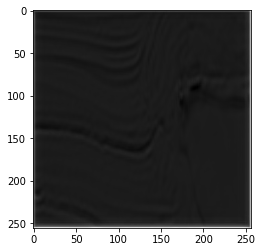

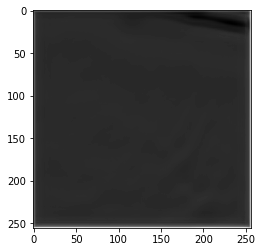

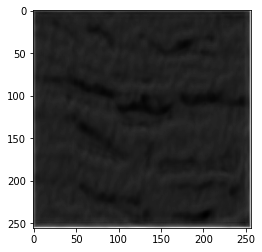

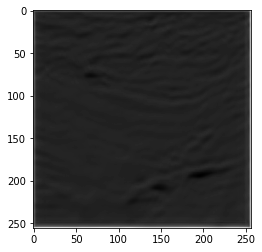

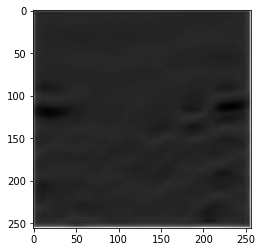

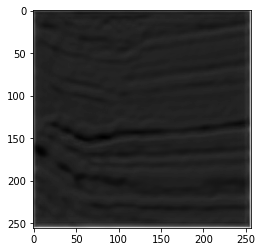

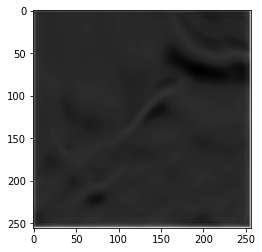

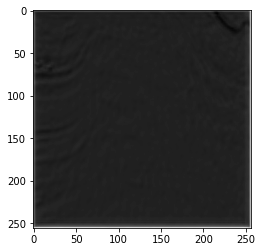

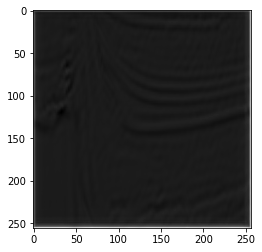

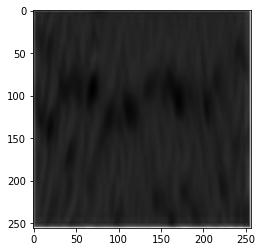

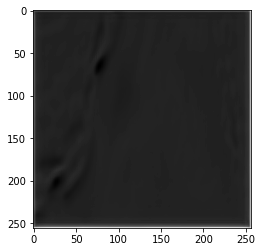

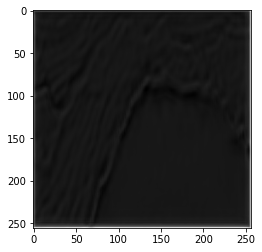

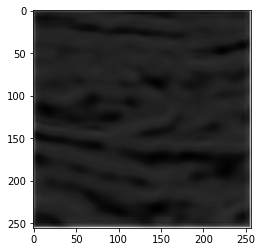

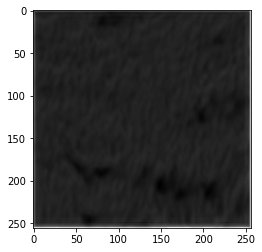

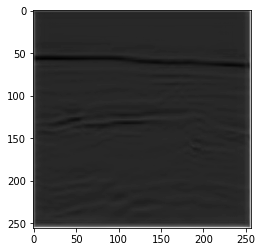

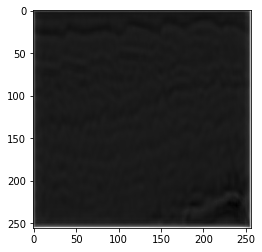

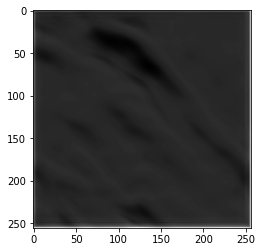

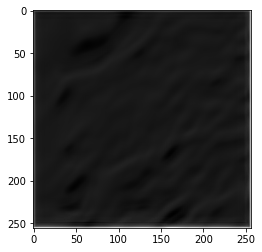

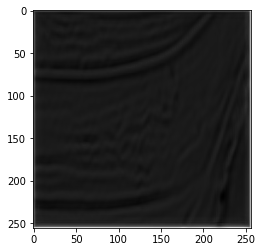

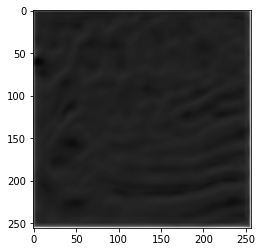

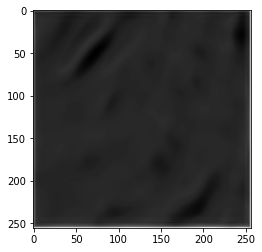

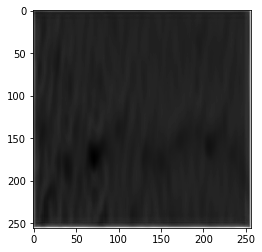

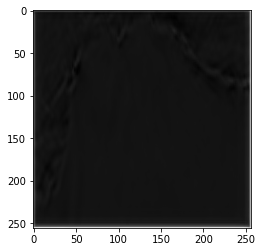

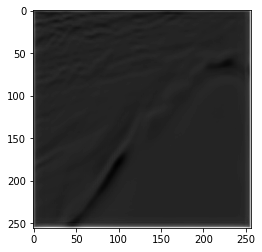

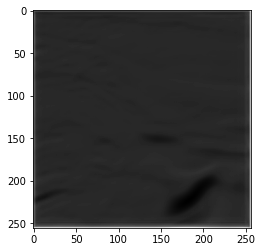

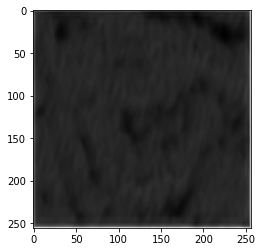

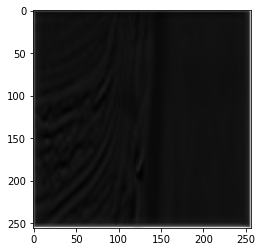

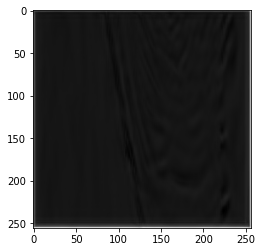

In [95]:
for i in range(results.shape[0]):

  results_ = results[i].reshape(256, 256)
  plt.imshow(results_, cmap='gray') 
  plt.show()

【問題2】コードリーディング